# Microprojet

![](fig/python-logo.png)


- Objectif pédagogique
- Exercice

***

*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), largement inspiré de <https://fitzinger.pages.math.unistra.fr/formation-python/>*

## Objectif pédagogique

- Utiliser les modules de la librairie standard pour récupérer des données via un service web.
- Manipuler les dictionnaires et les chaînes de caractères
- Utiliser la librairie de tracés graphiques matplotlib
- Utiliser un IDE (Spyder)
- Exécution en script
- Gestion des arguments

## Exercice

Exploiter les données du site [http://www.prevision-meteo.ch](http://www.prevision-meteo.ch) pour tracer l'évolution horaire de la température à Strasbourg aujourd'hui.

 ![](fig/icon.png)

## Ouverture du fichier de prévisions

Le site [http://www.prevision-meteo.ch](http://www.prevision-meteo.ch) fournit des prévisions sous forme de fichier au format [json](https://fr.wikipedia.org/wiki/JavaScript_Object_Notation). On veut récupérer les données relatives à Strasbourg avec la méthode ``urlopen()`` du module ``urllib.request``.

In [1]:
%config InlineBackend.figure_format = 'retina'
from urllib.request import urlopen

jsonfile_url = "http://www.prevision-meteo.ch/services/json/Strasbourg"
f = urlopen(jsonfile_url)  # open url

## Chargement du fichier json ouvert

La méthode ``json.loads()`` permet de charger un fichier json comme un dictionnaire python :

In [2]:
import json
jsonfile = json.loads(f.read().decode("utf-8"))  # Read JSON file

## Exploration des données

On commence naïvement par afficher le contenu du fichier :

In [3]:
print(jsonfile)

{'city_info': {'name': 'Strasbourg', 'country': 'France', 'latitude': '48.5844421', 'longitude': '7.7558331', 'elevation': '144', 'sunrise': '08:15', 'sunset': '16:36'}, 'forecast_info': {'latitude': None, 'longitude': None, 'elevation': '131.66'}, 'current_condition': {'date': '19.12.2017', 'hour': '20:00', 'tmp': 4, 'wnd_spd': 8, 'wnd_gust': 12, 'wnd_dir': 'O', 'pressure': 1036, 'humidity': 95, 'condition': 'Pluie faible', 'condition_key': 'pluie-faible', 'icon': 'https://www.prevision-meteo.ch/style/images/icon/pluie-faible.png', 'icon_big': 'https://www.prevision-meteo.ch/style/images/icon/pluie-faible-big.png'}, 'fcst_day_0': {'date': '19.12.2017', 'day_short': 'Mar.', 'day_long': 'Mardi', 'tmin': 0, 'tmax': 5, 'condition': 'Eclaircies', 'condition_key': 'eclaircies', 'icon': 'https://www.prevision-meteo.ch/style/images/icon/eclaircies.png', 'icon_big': 'https://www.prevision-meteo.ch/style/images/icon/eclaircies-big.png', 'hourly_data': {'0H00': {'ICON': 'https://www.prevision-me

On essaie de faire mieux en affichant uniquement les clés du dictionnaire :

In [4]:
for k in jsonfile:
    print(k)

city_info
forecast_info
current_condition
fcst_day_0
fcst_day_1
fcst_day_2
fcst_day_3
fcst_day_4


On est intéressé par le temps d'aujourd'hui :

In [5]:
day = jsonfile['fcst_day_0']
print(day)

{'date': '19.12.2017', 'day_short': 'Mar.', 'day_long': 'Mardi', 'tmin': 0, 'tmax': 5, 'condition': 'Eclaircies', 'condition_key': 'eclaircies', 'icon': 'https://www.prevision-meteo.ch/style/images/icon/eclaircies.png', 'icon_big': 'https://www.prevision-meteo.ch/style/images/icon/eclaircies-big.png', 'hourly_data': {'0H00': {'ICON': 'https://www.prevision-meteo.ch/style/images/icon/nuit-nuageuse.png', 'CONDITION': 'Nuit nuageuse', 'CONDITION_KEY': 'nuit-nuageuse', 'TMP2m': 0.3, 'DPT2m': -0.2, 'WNDCHILL2m': 0.3, 'HUMIDEX': None, 'RH2m': 97, 'PRMSL': 1030.3, 'APCPsfc': 0, 'WNDSPD10m': 4, 'WNDGUST10m': 7, 'WNDDIR10m': 279, 'WNDDIRCARD10': 'O', 'ISSNOW': 2, 'HCDC': '0.00', 'MCDC': '0.00', 'LCDC': '100.00', 'HGT0C': 400, 'KINDEX': 30, 'CAPE180_0': '0.0000', 'CIN180_0': 0}, '1H00': {'ICON': 'https://www.prevision-meteo.ch/style/images/icon/nuit-nuageuse.png', 'CONDITION': 'Nuit nuageuse', 'CONDITION_KEY': 'nuit-nuageuse', 'TMP2m': 0.4, 'DPT2m': -0.1, 'WNDCHILL2m': 0.4, 'HUMIDEX': None, 'RH2

Là aussi, on cherche les clés :

In [6]:
for k in day:
    print(k)

date
day_short
day_long
tmin
tmax
condition
condition_key
icon
icon_big
hourly_data


Vérifions qu'il s'agit d'aujourd'hui :

In [7]:
print(day['day_long'], day['date'])

Mardi 19.12.2017


C'est bon !
Maintenant, une entrée particulière nous intéresse :

In [8]:
day_hd = day['hourly_data']
for k in day_hd:
    print(k)

0H00
1H00
2H00
3H00
4H00
5H00
6H00
7H00
8H00
9H00
10H00
11H00
12H00
13H00
14H00
15H00
16H00
17H00
18H00
19H00
20H00
21H00
22H00
23H00


Regardons ce que contient une 'hourly_data' :

In [9]:
for k in day_hd['8H00']:
    print(k)

ICON
CONDITION
CONDITION_KEY
TMP2m
DPT2m
WNDCHILL2m
HUMIDEX
RH2m
PRMSL
APCPsfc
WNDSPD10m
WNDGUST10m
WNDDIR10m
WNDDIRCARD10
ISSNOW
HCDC
MCDC
LCDC
HGT0C
KINDEX
CAPE180_0
CIN180_0


La clé qui nous intéresse est la chaîne ``'TMP2m'`` qui correspond à la température à 2m du sol.

In [10]:
hour = '12H00'
print("Aujourd'hui à {}, il fera : {} deg. C.".format(hour, day_hd[hour]['TMP2m']))

Aujourd'hui à 12H00, il fera : 4.4 deg. C.


Sauver ces lignes de commandes dans le fichier ``today_stras.py`` en allant de l'exécution 1 au compteur d'exécution courant indiqué dans la cellule de code ci-dessus ``In [XX]``. Dans le cas présent :

In [11]:
%save today_stras.py 1-10

The following commands were written to file `today_stras.py`:
get_ipython().magic("config InlineBackend.figure_format = 'retina'")
from urllib.request import urlopen

jsonfile_url = "http://www.prevision-meteo.ch/services/json/Strasbourg"
f = urlopen(jsonfile_url)  # open url
import json
jsonfile = json.loads(f.read().decode("utf-8"))  # Read JSON file
print(jsonfile)
for k in jsonfile:
    print(k)
day = jsonfile['fcst_day_0']
print(day)
for k in day:
    print(k)
print(day['day_long'], day['date'])
day_hd = day['hourly_data']
for k in day_hd:
    print(k)
for k in day_hd['8H00']:
    print(k)
hour = '12H00'
print("Aujourd'hui à {}, il fera : {} deg. C.".format(hour, day_hd[hour]['TMP2m']))


## Tracé de la température

1. Ouvrir le fichier ``today_stras.py`` dans Spyder et nettoyer les ``print`` inutiles.
2. Exécutez le code dans Spyder et utilisez la fenêtre "Variable explorer" en haut à droite pour parcourir les données de votre dictionnaire.
3. Extraire la liste des couples ``(hour, temperature)`` où :
    - ``hour`` est un entier
    - ``temperature`` est un flottant
4. ordonner la liste selon les heures croissantes
5. convertir la liste en un *numpy array* ``t`` avec la méthode ``numpy.array()``
6. Transposer ``t`` pour obtenir le tableau ``[[liste of hours], [list of temperatures]]``
7. réaliser un tracé matplotlib en suivant [ce tutoriel](http://matplotlib.org/users/pyplot_tutorial.html) ou en intégrant les lignes de code suivantes : 

In [12]:
import matplotlib.pyplot as plt  # To be placed at the top of python file

# [Your previous code...]

# Plot T = T(hour)
fig = plt.figure()  # initialise figure
title = "{} {}".format(day_of_the_week, date_of_today)
fig.suptitle(title, fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)  # initialise a plot area
fig.subplots_adjust(top=0.85)
ax.set_title('Day temperature')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Temperature [deg. C]')

ax.plot(t[0], t[1])  # plot t[1] (tempe) as a function of t[0] (hour)

NameError: name 'day_of_the_week' is not defined

> **Option :** intégrer l'icone de la météo du jour en utilisant le module ``matplotlib.image``

<button data-toggle="collapse" data-target="#meteo_json" class='btn btn-primary'>Solution</button>

<div id="meteo_json" class="collapse">
Pas si vite ! Êtes-vous sûr ? Vraiment ?  
Alors rendez-vous dans `exos/meteo_json.py`

## Exercice sur les fonctions

Modifiez le programme météo en créant une fonction qui admet un des jours disponibles comme argument (aujourd'hui, demain, après-demain...)

<button data-toggle="collapse" data-target="#meteo_json_func" class='btn btn-primary'>Solution</button>

<div id="meteo_json_func" class="collapse">
Pas si vite ! Êtes-vous sûr ? Vraiment ?  
Alors allez voir une proposition de solution dans `exos/meteo_json_func.py`.

## Exécution en script

Pour pouvoir exécuter ce fichier en mode script

- Ajouter en première ligne du fichier: `#! python3`
- Rendez le fichier exécutable: `chmod a+x today_stras.py`

In [ ]:
%run exos/meteo_json.py

Pour différencier du code devant s'exécuter en mode script (par opposition a un import du module) on utilise la variable `__name__` pour exécuter du code différent.

In [ ]:
#! python3

def main():
    print('je suis dans un script')

if __name__ == '__main__':
    main()
else:
    # En mode module importé, on ne fait rien de plus
    pass

## Gestion des arguments

Pour pouvoir passer des arguments en ligne de commande, on peut utiliser le module [``argparse``](https://docs.python.org/3/library/argparse.html).

Un tutoriel est disponible [ici](https://docs.python.org/3/howto/argparse.html#argparse-tutorial).

In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                    help='an integer for the accumulator')
parser.add_argument('--sum', dest='accumulate', action='store_const',
                    const=sum, default=max,
                    help='sum the integers (default: find the max)')
print(type(parser))

In [ ]:
# Sans "--sum"
args = parser.parse_args(['2', '5'])
print(args.accumulate(args.integers))

In [ ]:
# Avec "--sum"
args = parser.parse_args(['--sum', '2', '5'])
print(args.accumulate(args.integers))


In [ ]:
# Certains arguments existent déjà
try:
    parser.parse_args(['--help'])
except SystemExit:
    # Pour éviter une erreur dans jupyter-notebook
    pass

## Exercice

Modifiez le programme météo pour qu'il prenne le(s) nom(s) de ville en argument(s) en utilisant le module ``argparse``


<button data-toggle="collapse" data-target="#meteo_json_func_args" class='btn btn-primary'>Solution</button>
<div id="meteo_json_func_args" class="collapse">
Pas si vite ! Êtes-vous sûr ? Vraiment ?  
Alors allez voir une proposition de solution dans `exos/meteo_json_func_args.py`.

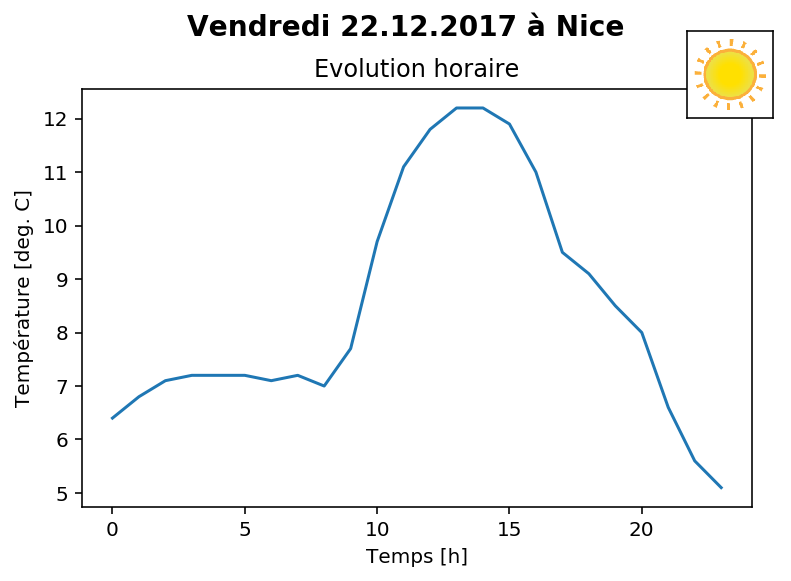

In [13]:
%run exos/meteo_json_func_args.py Nice -d 3

## Suite de l'exercice

- Laissez libre cours à vos idées et envies, par exemple :
    - en cherchant à tracer l'évolution horaire de la température dans les 5 prochains jours
    - etc.

- Dans Spyder :
    - testez le système de debugging
    - testez le profiler

> À vous de faire la pluie et le beau temps !